In [1]:
# Importing Libraries

from keras import Sequential, layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Loading and Selecting Columns

df = pd.read_csv("../kidney_disease.csv")[[
    "sg", "al", "sc", "hemo", "pcv", "wc", "rc", "htn", "classification"
]].dropna().copy()

In [3]:
# Encoding categorical values

label_encoders = {}
for col in df.columns:
    if not np.issubdtype(df[col].dtype, np.number):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le   # save encoder if we need to decode later

In [4]:
# Split Into Features (x) and Label (y)

X = df.drop("classification", axis=1)
y = df["classification"]

In [5]:
# Train-Test Spliting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
)

In [6]:
# Scale Features

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [7]:
# Build Neural Network

model = Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(1, activation="sigmoid"),
])

In [8]:
# Compile Model

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [9]:
# Training the Model

es = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,          # number of passes through training data
    batch_size=32,       # process 32 samples at a time
    callbacks=[es],
    verbose=0            # 0 = silent, 1 = progress bar
)

In [10]:
# Save Trained Model

model.save("ckd.keras")

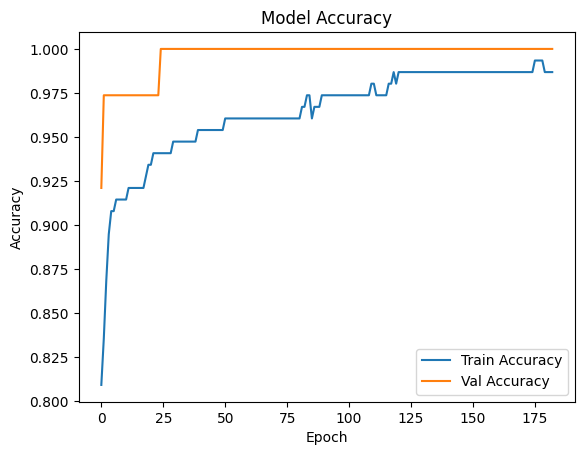

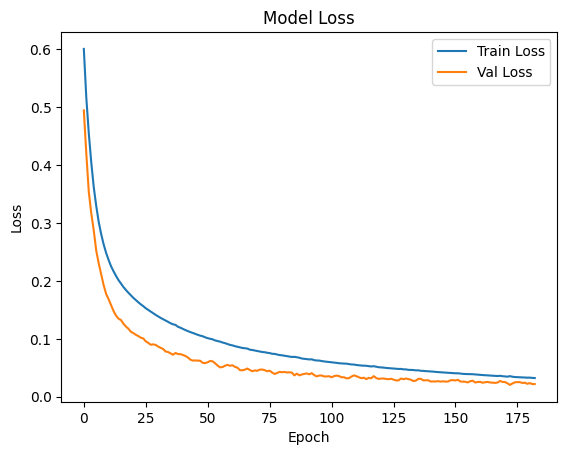

In [11]:
# Plot Training Results

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
# Making Prediction on Test Data

probs = model.predict(X_test)
pred = (probs >= 0.5).astype(int).ravel()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [13]:
# Printing Results

print("Original:  {0}".format(", ".join(str(int(v)) for v in y_test)))
print("Predicted: {0}".format(", ".join(str(int(v)) for v in pred)))

Original:  0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1
Predicted: 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1


In [14]:
# Evaluation Metrics

print("Test Accuracy:", accuracy_score(y_test, pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred, digits=3))

Test Accuracy: 1.0

Confusion Matrix:
 [[22  0]
 [ 0 26]]

Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        22
           1      1.000     1.000     1.000        26

    accuracy                          1.000        48
   macro avg      1.000     1.000     1.000        48
weighted avg      1.000     1.000     1.000        48

